### Optimize the Raman sideband cooling sequence

In [1]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_functions
from pathos.multiprocessing import Pool

#### Reproduce Yu et al. PRA (2018)

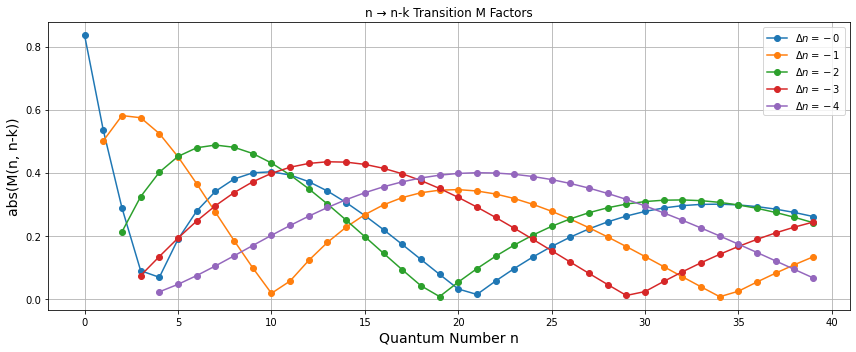

In [17]:
# Parameters
par_LD = 0.6  # Lamb-Dicke parameter
n_values = np.arange(0, 40)
max_deli_n = 4  # Maximum Δn to plot

# Plot setup
plt.figure(figsize=(12, 5))

# Loop through Δn values
for deli_n in range(0, max_deli_n + 1):
    x_vals = n_values[deli_n:]
    y_vals = [np.abs(RSC_functions.M_factor(n, n - deli_n, par_LD)) for n in x_vals]
    plt.plot(x_vals, y_vals, marker='o', label=f'$\\Delta n = -{deli_n}$')

# Plot formatting
plt.title('n → n-k Transition M Factors')
plt.xlabel('Quantum Number n', fontsize=14)
plt.ylabel('abs(M(n, n-k))', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


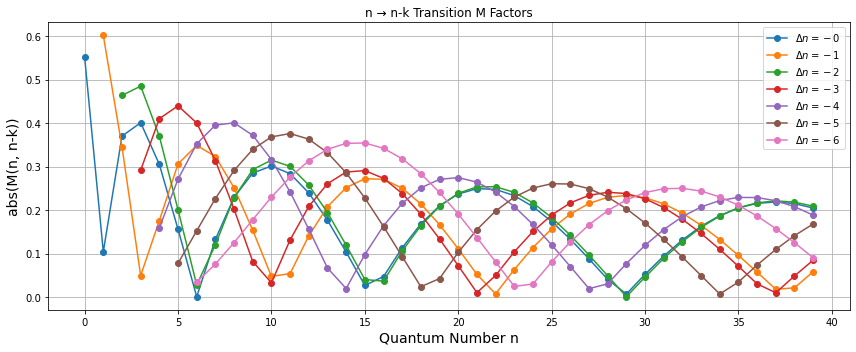

In [13]:
# Parameters
par_LD = 1.09  # Lamb-Dicke parameter
n_values = np.arange(0, 40)
max_deli_n = 6  # Maximum Δn to plot

# Plot setup
plt.figure(figsize=(12, 5))

# Loop through Δn values
for deli_n in range(0, max_deli_n + 1):
    x_vals = n_values[deli_n:]
    y_vals = [np.abs(RSC_functions.M_factor(n, n - deli_n, par_LD)) for n in x_vals]
    plt.plot(x_vals, y_vals, marker='o', label=f'$\\Delta n = -{deli_n}$')

# Plot formatting
plt.title('n → n-k Transition M Factors')
plt.xlabel('Quantum Number n', fontsize=14)
plt.ylabel('abs(M(n, n-k))', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


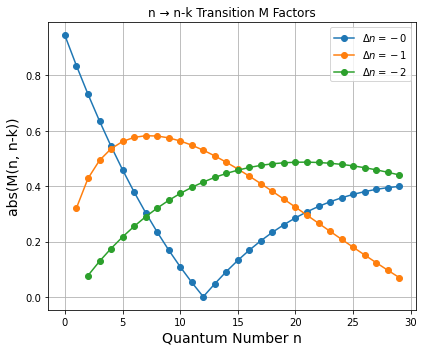

In [3]:
# Parameters
par_LD = 0.34  # Lamb-Dicke parameter
n_values = np.arange(0, 30)
max_deli_n = 2  # Maximum Δn to plot

# Plot setup
plt.figure(figsize=(6, 5))

# Loop through Δn values
for deli_n in range(0, max_deli_n + 1):
    x_vals = n_values[deli_n:]
    y_vals = [np.abs(RSC_functions.M_factor(n, n - deli_n, par_LD)) for n in x_vals]
    plt.plot(x_vals, y_vals, marker='o', label=f'$\\Delta n = -{deli_n}$')

# Plot formatting
plt.title('n → n-k Transition M Factors')
plt.xlabel('Quantum Number n', fontsize=14)
plt.ylabel('abs(M(n, n-k))', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Optical pumping

Text(0, 0.5, 'M Factor')

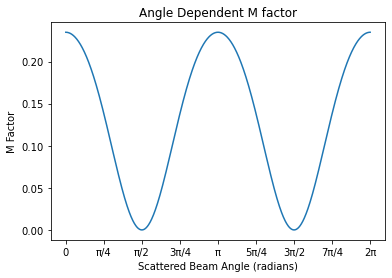

In [4]:
# Plot M_Factor over all angles
par_LD0 = 0.57  # Base Lamb-Dicke parameter
angle_pump = np.pi / 2  # Angle of the absorbed beam in radians
angle_scatter = np.linspace(0, 2 * np.pi, 1000)
plt.plot(angle_scatter, RSC_functions.M_factor(0, 1, RSC_functions.LD_par_angle(par_LD0, angle_pump, angle_scatter))**2)
plt.title('Angle Dependent M factor')
plt.xticks(np.arange(0, 2.1 * np.pi, np.pi / 4),
           ['0', 'π/4', 'π/2', '3π/4', 'π', '5π/4', '3π/2', '7π/4', '2π'])
plt.xlabel('Scattered Beam Angle (radians)')
plt.ylabel('M Factor')

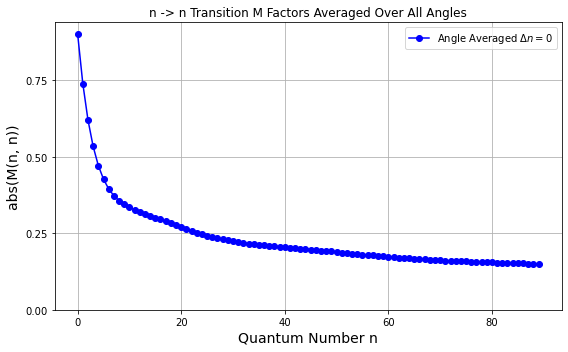

In [5]:
# Plot averaged M_Factor over all angles for n -> n 
n_values = np.arange(0, 90)
angle_pump = np.pi / 2  # Angle of the absorbed beam in radians
M_n_to_n_angle_avg = [np.abs(RSC_functions.OP_prob(n1=n, n2=n, LD0=par_LD0, angle_pump=angle_pump)) for n in n_values]
plt.figure(figsize=(8, 5))
plt.plot(n_values, M_n_to_n_angle_avg, marker='o', color='blue', label='Angle Averaged $\\Delta n = 0$')
plt.title('n -> n Transition M Factors Averaged Over All Angles')
plt.xlabel('Quantum Number n', fontsize=14)
plt.ylabel('abs(M(n, n))', fontsize=14)
plt.yticks(np.arange(0, 1., 0.25))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
RSC_functions.OP_prob(0, 0, LD0=0.55, angle_pump=np.pi/2)

0.9076331435907162

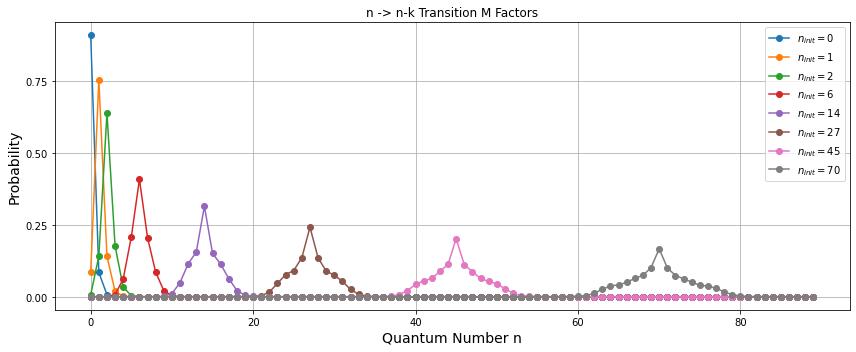

In [17]:
### Plot distribution spread after one photon of optical pumping
par_LD = 0.55  # Lamb-Dicke parameter
op_inc_angle = np.pi/2  # Incident angle of the pumping beam
n_values = np.arange(-90, 90)
plt.figure(figsize=(12, 5))
for n_init in [0, 1, 2, 6, 14, 27, 45, 70]:
    op_spread = [RSC_functions.OP_prob(n_init, n_init+ n, par_LD, op_inc_angle) for n in n_values if n_init+ n >= 0 and n_init+ n < 90]
    plt.plot([n_init+n for n in n_values if n_init+n>=0  and n_init+ n < 90], op_spread/(sum(op_spread)), marker='o', label='$n_{init}=$'+f'{n_init}')
plt.title('n -> n-k Transition M Factors')
plt.xlabel('Quantum Number n', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.yticks(np.arange(0, 1., 0.25))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Test

In [9]:
mol = RSC_functions.molecules(n=[3, 3, 5])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.5)
res = mol.Optical_pumping()

Before cooling, motinoal state: [3, 3, 5], internal state 1
Cooling success, motinoal state: [3, 3, 4], internal state -1
After OP # 1, photon scatter at [2.313898531188836, 1.3025443316696184], motional quanta [2, 2, 1], pump to state 0
After OP # 2, photon scatter at [2.435754015569922, 4.909700182311835], motional quanta [2, 4, 10], pump to state 0
After OP # 3, photon scatter at [1.076097939555754, 5.853766234679814], motional quanta [3, 4, 7], pump to state -1
After OP # 4, photon scatter at [2.6043333720064488, 1.5604850890825668], motional quanta [5, 3, 14], pump to state 1
Success after 4 OP cycles


In [10]:
mol = RSC_functions.molecules(n=[3, 3, 5])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.5)
res = mol.Optical_pumping()

Before cooling, motinoal state: [3, 3, 5], internal state 1
Cooling success, motinoal state: [3, 3, 4], internal state -1
After OP # 1, photon scatter at [0.1594269450760941, 4.938127064876049], motional quanta [4, 3, 10], pump to state 0
After OP # 2, photon scatter at [1.7542283380074912, 0.11396054020450047], motional quanta [5, 3, 6], pump to state 1
Success after 2 OP cycles


In [11]:
mol = RSC_functions.molecules(n=[10, 10, 20])
res = mol.Raman_transition(axis=2, delta_n=-4, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [10, 10, 20], internal state 1
Cooling success, motinoal state: [10, 10, 16], internal state -1
After OP # 1, photon scatter at [1.7613044676550165, 0.9682859082517197], motional quanta [9, 8, 15], pump to state -1
After OP # 2, photon scatter at [0.11460243247465612, 1.909495471786006], motional quanta [7, 8, 15], pump to state -1
After OP # 3, photon scatter at [1.6930881038350336, 1.518901827097683], motional quanta [9, 9, 16], pump to state 1
Success after 3 OP cycles


In [12]:
mol = RSC_functions.molecules(n=[10, 10, 20])
res = mol.Raman_transition(axis=2, delta_n=-4, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [10, 10, 20], internal state 1
Cooling success, motinoal state: [10, 10, 16], internal state -1
After OP # 1, photon scatter at [0.047110475604163246, 0.5699439369158343], motional quanta [8, 10, 6], pump to state 0
After OP # 2, photon scatter at [1.8082143891404945, 1.1034783096965928], motional quanta [9, 10, 15], pump to state 1
Success after 2 OP cycles


In [13]:
mol = RSC_functions.molecules(n=[10, 10, 20])
res = mol.Raman_transition(axis=2, delta_n=-4, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [10, 10, 20], internal state 1
Cooling success, motinoal state: [10, 10, 16], internal state -1
After OP # 1, photon scatter at [2.3247724866643846, 5.772052678346008], motional quanta [9, 11, 10], pump to state 1
Success after 1 OP cycles


In [ ]:
mol = RSC_functions.molecules(n=[20, 10, 20])
res = mol.Raman_transition(axis=0, delta_n=-4, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [20, 10, 20], internal state 1
Cooling success, motinoal state: [16, 10, 20], internal state -1
After OP # 1, photon scatter at [2.8850426774040234, 2.2190368194612633], motional quanta [12, 10, 11], pump to state 1
Success after 1 OP cycles


### Sequence

In [12]:
RSC_functions.convert_to_LD(RSC_functions.k_vec/np.sqrt(2), 10e3*2*np.pi)

1.0951357113179434

In [13]:
RSC_functions.convert_to_LD(np.sqrt(2)*RSC_functions.k_vec, 60e3*2*np.pi)

0.8941745639429538

#### Import pulse parameter from experiment

In [66]:
amp_matrix = {
    "0": [0.92],
    "X": [0.3, 0.65, 0.65],
    "Y": [0.3, 0.65, 0.65],
    "Z": [0.14, 0.14, 0.14, 0.28, 0.28]
}


duration_matrix = {
    "OP": [8e-5],
    "CO": [1e-4],
    "X": [5e-5, 7e-5, 7e-5],
    "Y": [5e-5, 7e-5, 7e-5],
    "Z": [2e-4, 2e-4, 2e-4, 5e-5, 5e-5]
}

##### Scaling

In [67]:
scaling_x = np.pi/0.3/(amp_matrix['X'][-1]*duration_matrix['X'][-1])
scaling_y = np.pi/0.3/(amp_matrix['Y'][-1]*duration_matrix['Y'][-1])
scaling_z = np.pi/0.3/(amp_matrix['Z'][-1]*duration_matrix['Z'][-1])

def pulse_time(axis, delta_n):
    if axis==0:
        return scaling_x*amp_matrix['X'][-delta_n-1]*duration_matrix['X'][-delta_n-1]
    if axis==1:
        return scaling_y*amp_matrix['Y'][-delta_n-1]*duration_matrix['Y'][-delta_n-1]
    else:
        return scaling_z*amp_matrix['Z'][-delta_n-1]*duration_matrix['Z'][-delta_n-1]

In [68]:
t = np.pi/0.4

In [69]:
sequence_XY = [[0, -3, pulse_time(0, -3)], [1, -3, pulse_time(1, -3)], [0, -2, pulse_time(0, -2)], [1, -2, pulse_time(1, -2)]]
sequence_XYZ1 = [[2, -5, pulse_time(2, -5)], [0, -2, pulse_time(0, -2)], [2, -4, pulse_time(2, -4)], [1, -2, pulse_time(1, -2)], 
                 [2, -5, pulse_time(2, -5)], [0, -1, pulse_time(0, -1)], [2, -4, pulse_time(2, -4)], [1, -1, pulse_time(1, -1)]]
sequence_XYZ2 = [[2, -4, pulse_time(2, -4)], [0, -2, pulse_time(0, -2)], [2, -3, pulse_time(2, -3)], [1, -2, pulse_time(1, -2)], 
                 [2, -4, pulse_time(2, -4)], [0, -1, pulse_time(0, -1)], [2, -3, pulse_time(2, -3)], [1, -1, pulse_time(1, -1)]]
sequence_XYZ3 = [[2, -3, pulse_time(2, -3)], [0, -2, pulse_time(0, -2)], [2, -2, pulse_time(2, -2)], [1, -2, pulse_time(1, -2)], 
                 [2, -3, pulse_time(2, -3)], [0, -1, pulse_time(0, -1)], [2, -2, pulse_time(2, -2)], [1, -1, pulse_time(1, -1)]]
sequence_XYZ4 = [[2, -2, pulse_time(2, -2)], [0, -2, pulse_time(0, -2)], [2, -1, pulse_time(2, -1)], [1, -2, pulse_time(1, -2)], 
                 [2, -2, pulse_time(2, -2)], [0, -1, pulse_time(0, -1)], [2, -1, pulse_time(2, -1)], [1, -1, pulse_time(2, -1)]]

In [2]:
sequence_XY, sequence_XYZ1, sequence_XYZ2, sequence_XYZ3, sequence_XYZ4 = RSC_functions.get_sequence()

In [3]:
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 100e-6], 100)
sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
print(f"n_bar: {avg}, spread: {spread}, temp: {temps}")

n_bar: [7.49, 7.83, 19.67], spread: [0.7693497254175112, 0.8325929377552995, 1.1517860044296424], temp: [2.416813742982035e-05, 2.2833894332658944e-05, 0.009996969895578408]


### 10 * XY

Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 19.01molecule/s]


After sequence # 0, n̄: [5.86, 7.14, 17.48], spread: [0.7615799367105203, 0.8866814535107859, 1.1946949401416247], temp: [9.301757227762748e-06, 1.0938326415637586e-05, 3.0143005140040458e-05]
Total optical cycles: 453


Applying Raman sequence: 100%|██████████| 100/100 [00:04<00:00, 23.63molecule/s]


After sequence # 1, n̄: [5.17, 6.07, 16.88], spread: [0.7707210909271913, 0.828885396179713, 1.0858434509633512], temp: [5.994710705105637e-06, 8.865159827832332e-06, 2.9008439676103513e-05]
Total optical cycles: 379


Applying Raman sequence: 100%|██████████| 100/100 [00:03<00:00, 27.26molecule/s]


After sequence # 2, n̄: [4.06, 4.84, 15.78], spread: [0.6887408801574072, 0.790786949816447, 1.0129738397411852], temp: [5.038670282155857e-06, 5.3262223765396775e-06, 2.7457173915616004e-05]
Total optical cycles: 326


Applying Raman sequence: 100%|██████████| 100/100 [00:02<00:00, 38.91molecule/s]


After sequence # 3, n̄: [3.0, 4.41, 16.82], spread: [0.5844655678480983, 0.7865233626536468, 1.0688666895361645], temp: [4.013642953595718e-06, 4.897210012037476e-06, 3.992156312334827e-05]
Total optical cycles: 238


Applying Raman sequence: 100%|██████████| 100/100 [00:02<00:00, 34.59molecule/s]


After sequence # 4, n̄: [2.5, 3.62, 18.77], spread: [0.5086255990411808, 0.766261052122578, 1.1241756980116586], temp: [4.04502172018429e-06, 4.3612729298726045e-06, 3.605340777473573e-05]
Total optical cycles: 274


Applying Raman sequence: 100%|██████████| 100/100 [00:02<00:00, 46.36molecule/s]


After sequence # 5, n̄: [1.93, 2.93, 18.15], spread: [0.47185908913572927, 0.6380054858698316, 1.1129577709868421], temp: [3.703486576114502e-06, 3.7612870928677e-06, 3.879578489724312e-05]
Total optical cycles: 192


Applying Raman sequence: 100%|██████████| 100/100 [00:01<00:00, 56.59molecule/s]


After sequence # 6, n̄: [1.61, 2.51, 18.01], spread: [0.4076505856735643, 0.5206716815806292, 1.073172399943271], temp: [4.22267202794033e-06, 3.984162560697649e-06, 4.471265152069015e-05]
Total optical cycles: 170


Applying Raman sequence: 100%|██████████| 100/100 [00:01<00:00, 59.81molecule/s]


After sequence # 7, n̄: [1.39, 2.19, 18.99], spread: [0.34522311625961544, 0.5369720663125783, 1.1235208053258292], temp: [3.66184515808993e-06, 3.88976039628298e-06, 3.9815254080908105e-05]
Total optical cycles: 149


Applying Raman sequence: 100%|██████████| 100/100 [00:01<00:00, 99.22molecule/s]


After sequence # 8, n̄: [1.2, 1.7, 18.78], spread: [0.3301514803843836, 0.41315856520227195, 1.0760650537955407], temp: [4.009839741319515e-06, 4.554474098300251e-06, 0.009994796366893113]
Total optical cycles: 91


Applying Raman sequence: 100%|██████████| 100/100 [00:00<00:00, 148.17molecule/s]


After sequence # 9, n̄: [1.08, 1.53, 17.65], spread: [0.32114794098670474, 0.3626168777097944, 1.0861284454428028], temp: [3.6569956214998786e-06, 4.738053190993837e-06, 6.970321869278825e-05]
Total optical cycles: 63


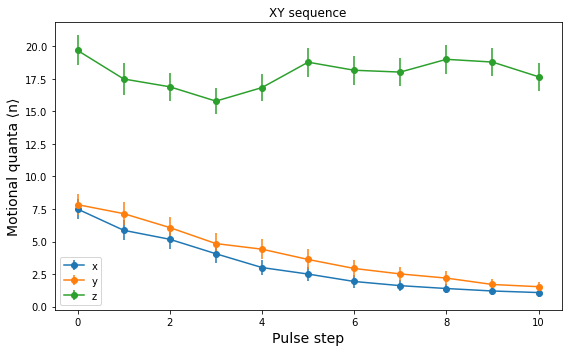

In [4]:
# Storage for tracking n̄ and σ
n_bars = []
std_ns = []
n_bars.append(avg)
std_ns.append(spread)


# Run sequence over multiple iterations
for n in range(10):
    all_results, total_op_cycles = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XY, print_report=False
    )
    sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
    print(f"After sequence # {n}, n̄: {avg}, spread: {spread}, temp: {temps}")
    print(f"Total optical cycles: {total_op_cycles}")

    n_bars.append(avg)
    std_ns.append(spread)

# Convert to arrays
n_bars = np.array(n_bars)     # shape (steps, 3)
std_ns = np.array(std_ns)     # shape (steps, 3)
steps = np.arange(len(n_bars))

# Plot using error bars
plt.figure(figsize=(8, 5))
plt.errorbar(steps, n_bars[:, 0], yerr=std_ns[:, 0], label='x', fmt='-o')
plt.errorbar(steps, n_bars[:, 1], yerr=std_ns[:, 1], label='y', fmt='-o')
plt.errorbar(steps, n_bars[:, 2], yerr=std_ns[:, 2], label='z', fmt='-o')

plt.title("XY sequence")
plt.xlabel("Pulse step", fontsize=14)
plt.ylabel("Motional quanta ⟨n⟩", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mol_list = RSC_functions.initialize_thermal([4.3e-6, 4.3e-6, 100e-6], 100)
sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
print(f"n_bar: {avg}, spread: {spread}, temp: {temps}")

n_bar: [0.89, 1.59, 18.42], spread: [0.12481586437628833, 0.21311733857197074, 1.1569943820088322], temp: [3.912672766173824e-06, 6.33983154579553e-06, 5.9351005491155404e-05]


### 5 * XYZ1

In [6]:
def run_sequence(sequence, iteration, mol_temps=[4.3e-6, 4.3e-6, 100e-6], mol_num=100):
    mol_list = RSC_functions.initialize_thermal(mol_temps, mol_num)
    sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
    n_bars = []
    std_ns = []
    n_bars.append(avg)
    std_ns.append(spread)
    for n in range(iteration):
        all_results, total_op_cycles = RSC_functions.apply_raman_sequence(
            mol_list=mol_list, pulse_sequence=sequence, print_report=False
        )
        sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)

        n_bars.append(avg)
        std_ns.append(spread)

    return (n_bars, std_ns)



#### Get final n bar vs scaling in Rabi frequency for $\Delta n = 1$ in radial and axial $\Delta n = 4,5$ direction

In [3]:
radial_delta_1_scale = np.linspace(0.4, 1.6, 25)
axial_scale = np.linspace(0.4, 1.6, 25)

In [4]:
sequences_XYZ1 = []
for r_scale in radial_delta_1_scale:
    for a_scale in axial_scale:
        m = np.ones((3, 5))
        m[0,0] = r_scale
        m[1,0] = r_scale
        m[2,4] = a_scale
        m[2,3] = a_scale
        _, sq, _, _, _ = RSC_functions.get_sequence(m)
        sequences_XYZ1.append(sq)

In [7]:
arg_list = []
temp = [4.3e-6, 4.3e-6, 100e-6]
mol_num = 100
for sq in sequences_XYZ1:
    arg_list.append((sq, 5, temp, mol_num))

In [8]:
with Pool() as pool:
    result = pool.starmap(run_sequence, arg_list)

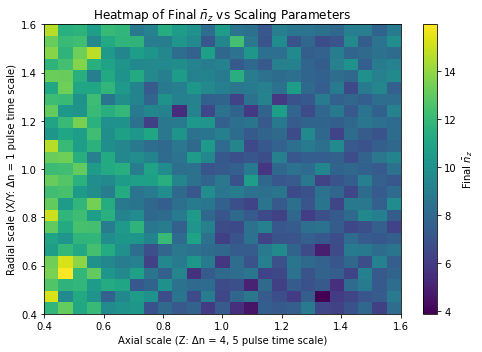

In [9]:
n_rad = len(radial_delta_1_scale)
n_ax = len(axial_scale)

# Collect final n̄_z values
final_nz = np.array([r[0][-1][2] for r in result])  # r[0] = n_bars, r[0][-1] = last step, [2] = z axis

# Reshape into 2D array for heatmap
final_nz_grid = final_nz.reshape((n_rad, n_ax))  # rows = radial scale, cols = axial scale

# Plot heatmap
plt.figure(figsize=(7, 5))
im = plt.imshow(final_nz_grid, origin='lower', aspect='auto',
                extent=[axial_scale[0], axial_scale[-1], radial_delta_1_scale[0], radial_delta_1_scale[-1]],
                cmap='viridis')

plt.colorbar(im, label='Final $\\bar{n}_z$')
plt.xlabel('Axial scale (Z: Δn = 4, 5 pulse time scale)')
plt.ylabel('Radial scale (X/Y: Δn = 1 pulse time scale)')
plt.title('Heatmap of Final $\\bar{n}_z$ vs Scaling Parameters')
plt.tight_layout()
plt.show()

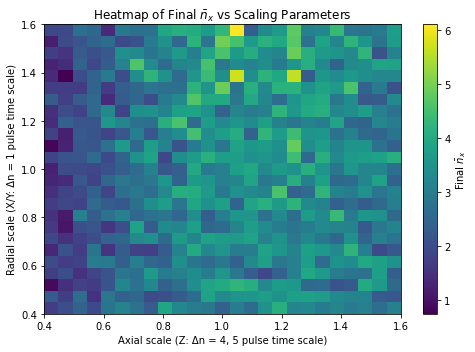

In [11]:
n_rad = len(radial_delta_1_scale)
n_ax = len(axial_scale)

# Collect final n̄_z values
final_nz = np.array([r[0][-1][0] for r in result])  # r[0] = n_bars, r[0][-1] = last step, [2] = z axis

# Reshape into 2D array for heatmap
final_nz_grid = final_nz.reshape((n_rad, n_ax))  # rows = radial scale, cols = axial scale

# Plot heatmap
plt.figure(figsize=(7, 5))
im = plt.imshow(final_nz_grid, origin='lower', aspect='auto',
                extent=[axial_scale[0], axial_scale[-1], radial_delta_1_scale[0], radial_delta_1_scale[-1]],
                cmap='viridis')

plt.colorbar(im, label='Final $\\bar{n}_x$')
plt.xlabel('Axial scale (Z: Δn = 4, 5 pulse time scale)')
plt.ylabel('Radial scale (X/Y: Δn = 1 pulse time scale)')
plt.title('Heatmap of Final $\\bar{n}_x$ vs Scaling Parameters')
plt.tight_layout()
plt.show()

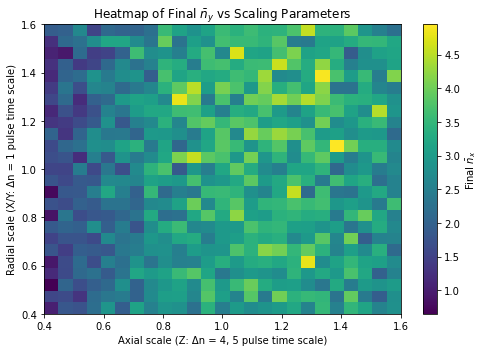

In [12]:
n_rad = len(radial_delta_1_scale)
n_ax = len(axial_scale)

# Collect final n̄_z values
final_nz = np.array([r[0][-1][1] for r in result])  # r[0] = n_bars, r[0][-1] = last step, [2] = z axis

# Reshape into 2D array for heatmap
final_nz_grid = final_nz.reshape((n_rad, n_ax))  # rows = radial scale, cols = axial scale

# Plot heatmap
plt.figure(figsize=(7, 5))
im = plt.imshow(final_nz_grid, origin='lower', aspect='auto',
                extent=[axial_scale[0], axial_scale[-1], radial_delta_1_scale[0], radial_delta_1_scale[-1]],
                cmap='viridis')

plt.colorbar(im, label='Final $\\bar{n}_x$')
plt.xlabel('Axial scale (Z: Δn = 4, 5 pulse time scale)')
plt.ylabel('Radial scale (X/Y: Δn = 1 pulse time scale)')
plt.title('Heatmap of Final $\\bar{n}_y$ vs Scaling Parameters')
plt.tight_layout()
plt.show()

In [13]:
np.savez("data/scan_amp.npz", results=result, radial_delta_1_scale=radial_delta_1_scale, axial_scale=axial_scale)

Applying Raman sequence: 100%|██████████| 100/100 [00:08<00:00, 12.18molecule/s]


After sequence # 0, n̄: [1.48, 2.28, 12.47], spread: [0.2295560933628206, 0.4578383994380551, 1.133530326016909], temp: [3.989131571912564e-06, 3.6037640417230146e-06, 6.958791935436852e-06]
Total optical cycles: 919


Applying Raman sequence: 100%|██████████| 100/100 [00:07<00:00, 12.69molecule/s]


After sequence # 1, n̄: [1.87, 2.83, 10.67], spread: [0.3336630036428972, 0.6183938874212778, 1.1105003376856757], temp: [3.8844175269207094e-06, 3.284431642865577e-06, 4.182412868202138e-06]
Total optical cycles: 855


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 16.91molecule/s]


After sequence # 2, n̄: [2.51, 3.01, 8.69], spread: [0.4659388371878867, 0.6296816656057249, 0.9846517150749292], temp: [3.758007431312431e-06, 3.152659330548889e-06, 3.338237882750294e-06]
Total optical cycles: 643


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 17.87molecule/s]


After sequence # 3, n̄: [2.34, 3.25, 8.63], spread: [0.4008041915948485, 0.6032205235235286, 1.0813560930609305], temp: [3.3433810606444544e-06, 3.822225324680525e-06, 2.9480105928841367e-06]
Total optical cycles: 567


Applying Raman sequence: 100%|██████████| 100/100 [00:04<00:00, 21.68molecule/s]


After sequence # 4, n̄: [2.45, 3.33, 6.89], spread: [0.48401962770119156, 0.6703812348209041, 0.9189009739901248], temp: [2.8973942684297756e-06, 3.2820599293202874e-06, 2.3646837586418377e-06]
Total optical cycles: 473


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 17.01molecule/s]


After sequence # 5, n̄: [3.1, 4.31, 7.99], spread: [0.6918814927427962, 0.7892648478172584, 1.070186432356531], temp: [2.9508360110392833e-06, 3.0561969722825195e-06, 2.3764651955774724e-06]
Total optical cycles: 539


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 16.99molecule/s]


After sequence # 6, n̄: [3.69, 4.93, 6.45], spread: [0.7213452710041149, 0.8097227920714596, 0.8580646828765299], temp: [3.1035162240649327e-06, 3.7982009414303455e-06, 2.2211775656323735e-06]
Total optical cycles: 546


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 15.85molecule/s]


After sequence # 7, n̄: [4.09, 4.46, 7.59], spread: [0.7797557309824662, 0.7112552284517843, 1.0159817911754128], temp: [2.874964239922252e-06, 2.9256093235549942e-06, 2.505426043472154e-06]
Total optical cycles: 576


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 19.52molecule/s]


After sequence # 8, n̄: [5.02, 4.5, 6.78], spread: [0.9535176977906599, 0.7601973427998812, 1.0646670841159689], temp: [2.666067222868683e-06, 2.506285315846225e-06, 1.845496725776797e-06]
Total optical cycles: 460


Applying Raman sequence: 100%|██████████| 100/100 [00:04<00:00, 23.10molecule/s]


After sequence # 9, n̄: [4.59, 5.08, 5.82], spread: [0.9231570830579159, 0.8663348082583315, 0.9073455791483198], temp: [2.1920450564332047e-06, 2.6952297371093306e-06, 2.022125953182703e-06]
Total optical cycles: 373


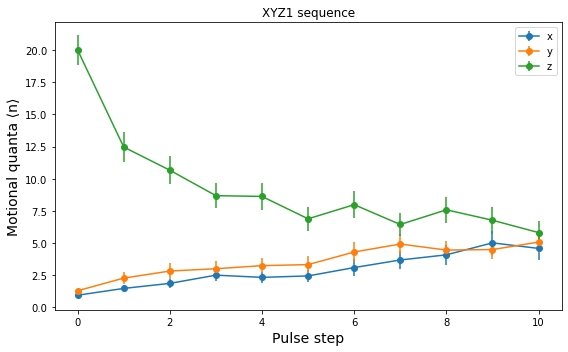

In [ ]:
# Storage for tracking n̄ and σ
n_bars = []
std_ns = []
n_bars.append(avg)
std_ns.append(spread)

# Run sequence over multiple iterations
for n in range(5):
    all_results, total_op_cycles = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ1, print_report=False
    )
    sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
    print(f"After sequence # {n}, n̄: {avg}, spread: {spread}, temp: {temps}")
    print(f"Total optical cycles: {total_op_cycles}")

    n_bars.append(avg)
    std_ns.append(spread)

# Convert to arrays
n_bars = np.array(n_bars)     # shape (steps, 3)
std_ns = np.array(std_ns)     # shape (steps, 3)
steps = np.arange(len(n_bars))

# Plot using error bars
plt.figure(figsize=(8, 5))
plt.errorbar(steps, n_bars[:, 0], yerr=std_ns[:, 0], label='x', fmt='-o')
plt.errorbar(steps, n_bars[:, 1], yerr=std_ns[:, 1], label='y', fmt='-o')
plt.errorbar(steps, n_bars[:, 2], yerr=std_ns[:, 2], label='z', fmt='-o')

plt.title("XYZ1 sequence")
plt.xlabel("Pulse step", fontsize=14)
plt.ylabel("Motional quanta ⟨n⟩", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### 5 * XYZ2

Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 19.23molecule/s]


After sequence # 0, n̄: [3.93, 3.04, 9.85], spread: [0.7055855724148561, 0.5725242352948914, 1.0918218719186752], temp: [3.5982852592927985e-06, 3.2105923277019265e-06, 3.0766641186977004e-06]
Total optical cycles: 502


Applying Raman sequence: 100%|██████████| 100/100 [00:04<00:00, 20.04molecule/s]


After sequence # 1, n̄: [4.27, 3.39, 9.09], spread: [0.7630013106148639, 0.6740764051648744, 1.0009090867806125], temp: [3.2034128439160308e-06, 2.4635953964909236e-06, 4.400465622214646e-06]
Total optical cycles: 440


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 16.43molecule/s]


After sequence # 2, n̄: [4.11, 4.1, 7.85], spread: [0.7552344006995445, 0.8567963585356791, 0.8890866099542833], temp: [2.929084671808204e-06, 2.3922967958140337e-06, 3.871020923217221e-06]
Total optical cycles: 554


Applying Raman sequence: 100%|██████████| 100/100 [00:03<00:00, 25.47molecule/s]


After sequence # 3, n̄: [4.31, 4.2, 8.93], spread: [0.7170348666557297, 0.7866384175718856, 1.0259878166917968], temp: [2.834364018063995e-06, 2.3388589370262696e-06, 3.86955861918961e-06]
Total optical cycles: 334


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 19.05molecule/s]

After sequence # 4, n̄: [4.78, 4.56, 8.58], spread: [0.7577044278608909, 0.8215010651240812, 1.1023774308284797], temp: [3.067160429328566e-06, 2.6517316054115828e-06, 3.1916627496452275e-06]
Total optical cycles: 442


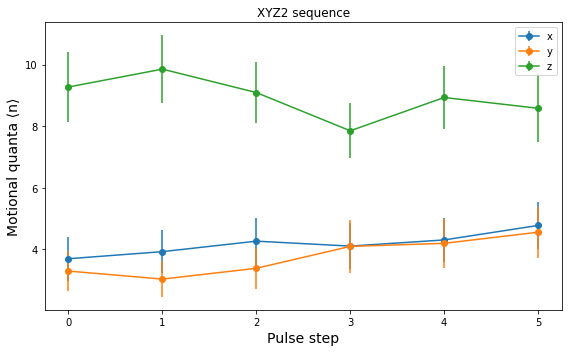

In [74]:
# Storage for tracking n̄ and σ
n_bars = []
std_ns = []
n_bars.append(avg)
std_ns.append(spread)

# Run sequence over multiple iterations
for n in range(5):
    all_results, total_op_cycles = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ2, print_report=False
    )
    sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
    print(f"After sequence # {n}, n̄: {avg}, spread: {spread}, temp: {temps}")
    print(f"Total optical cycles: {total_op_cycles}")

    n_bars.append(avg)
    std_ns.append(spread)

# Convert to arrays
n_bars = np.array(n_bars)     # shape (steps, 3)
std_ns = np.array(std_ns)     # shape (steps, 3)
steps = np.arange(len(n_bars))

# Plot using error bars
plt.figure(figsize=(8, 5))
plt.errorbar(steps, n_bars[:, 0], yerr=std_ns[:, 0], label='x', fmt='-o')
plt.errorbar(steps, n_bars[:, 1], yerr=std_ns[:, 1], label='y', fmt='-o')
plt.errorbar(steps, n_bars[:, 2], yerr=std_ns[:, 2], label='z', fmt='-o')

plt.title("XYZ2 sequence")
plt.xlabel("Pulse step", fontsize=14)
plt.ylabel("Motional quanta ⟨n⟩", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### 10 * XYZ3

Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 16.59molecule/s]


After sequence # 0, n̄: [5.13, 4.46, 9.34], spread: [0.7285128687950543, 0.8809562985755877, 1.1142908058491732], temp: [5.073233756026441e-06, 2.947125168414863e-06, 2.544359327522947e-06]
Total optical cycles: 578


Applying Raman sequence: 100%|██████████| 100/100 [00:07<00:00, 13.34molecule/s]


After sequence # 1, n̄: [6.03, 5.39, 10.0], spread: [0.8136897443129045, 0.9113610700485291, 1.1513470371699404], temp: [4.3784232981464265e-06, 3.187182853011574e-06, 3.334812349806747e-06]
Total optical cycles: 664


Applying Raman sequence: 100%|██████████| 100/100 [00:07<00:00, 13.73molecule/s]


After sequence # 2, n̄: [6.07, 5.67, 12.53], spread: [0.8638582059574361, 0.976939609187794, 1.2396334135541847], temp: [3.648432752119846e-06, 3.625666753621475e-06, 4.089824404939054e-06]
Total optical cycles: 621


Applying Raman sequence: 100%|██████████| 100/100 [00:07<00:00, 13.75molecule/s]


After sequence # 3, n̄: [5.56, 5.58, 10.53], spread: [0.8363396439246438, 0.8730612807815955, 1.1084633507698842], temp: [4.360202181801604e-06, 3.75381246222906e-06, 3.1236488693885715e-06]
Total optical cycles: 604


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 14.76molecule/s]


After sequence # 4, n̄: [6.34, 5.76, 11.48], spread: [0.9514431144319664, 0.8993464293585648, 1.164171808626201], temp: [3.6589768835243127e-06, 3.6583680749740036e-06, 2.528586164091726e-06]
Total optical cycles: 578


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 16.55molecule/s]


After sequence # 5, n̄: [5.73, 5.56, 10.9], spread: [0.8552023152447612, 0.8647913043041078, 1.2223338332877804], temp: [3.632648847713035e-06, 3.682128454925715e-06, 2.652951842580432e-06]
Total optical cycles: 520


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 15.02molecule/s]


After sequence # 6, n̄: [5.99, 5.64, 10.71], spread: [0.9374961333253594, 0.8658544912397232, 1.2214168002774484], temp: [5.330960405954593e-06, 3.275240465436229e-06, 2.6640198690105907e-06]
Total optical cycles: 547


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 14.87molecule/s]


After sequence # 7, n̄: [6.0, 5.86, 10.15], spread: [0.9172785836374902, 0.9157532418725036, 1.191920718839974], temp: [4.5644205670653355e-06, 3.1228434360544473e-06, 2.4051024119463967e-06]
Total optical cycles: 555


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 15.07molecule/s]


After sequence # 8, n̄: [6.22, 5.78, 9.37], spread: [0.9951462204118549, 0.9195194397075029, 1.047535679583278], temp: [4.236569792102823e-06, 2.8973491600738746e-06, 2.0882076641392717e-06]
Total optical cycles: 558


Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 17.12molecule/s]

After sequence # 9, n̄: [6.52, 5.74, 8.87], spread: [0.9643111531036028, 0.9379360319339479, 1.0119935770547164], temp: [4.428515579011704e-06, 3.7470355526154127e-06, 1.993563532173253e-06]
Total optical cycles: 497


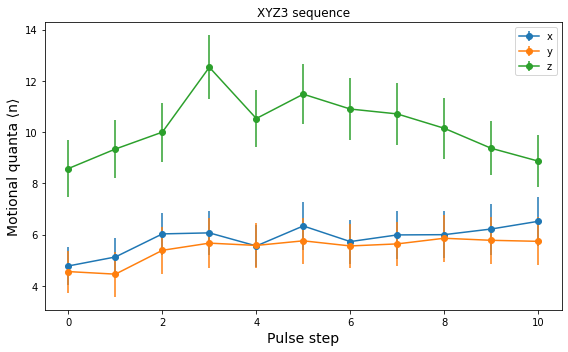

In [75]:
# Storage for tracking n̄ and σ
n_bars = []
std_ns = []
n_bars.append(avg)
std_ns.append(spread)

# Run sequence over multiple iterations
for n in range(10):
    all_results, total_op_cycles = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ3, print_report=False
    )
    sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
    print(f"After sequence # {n}, n̄: {avg}, spread: {spread}, temp: {temps}")
    print(f"Total optical cycles: {total_op_cycles}")

    n_bars.append(avg)
    std_ns.append(spread)

# Convert to arrays
n_bars = np.array(n_bars)     # shape (steps, 3)
std_ns = np.array(std_ns)     # shape (steps, 3)
steps = np.arange(len(n_bars))

# Plot using error bars
plt.figure(figsize=(8, 5))
plt.errorbar(steps, n_bars[:, 0], yerr=std_ns[:, 0], label='x', fmt='-o')
plt.errorbar(steps, n_bars[:, 1], yerr=std_ns[:, 1], label='y', fmt='-o')
plt.errorbar(steps, n_bars[:, 2], yerr=std_ns[:, 2], label='z', fmt='-o')

plt.title("XYZ3 sequence")
plt.xlabel("Pulse step", fontsize=14)
plt.ylabel("Motional quanta ⟨n⟩", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### 10 * XYZ4

In [63]:
for n in range(10):
    all_results, total_op_cycles = RSC_functions.apply_raman_sequence(mol_list=mol_list, pulse_sequence=sequence_XYZ4, print_report=False)
    sx, sy, sz, istate, avg, spread, temps = RSC_functions.readout_molecule_properties(mol_list)
    print(f"After sequence # {n}, n_bar: {avg}, spread: {spread}, temp: {temps}")
    print(f"Total optical cycles: {total_op_cycles}")

Applying Raman sequence: 100%|██████████| 100/100 [00:05<00:00, 17.86molecule/s]


After sequence # 0, n_bar: [4.52, 2.86, 8.64], spread: [7.306818733210782, 5.877108132406617, 11.040398543530936], temp: [4.824523917557212e-06, 1.9563893504809255e-06, 2.151526605909253e-06]
Total optical cycles: 591


Applying Raman sequence: 100%|██████████| 100/100 [00:07<00:00, 14.17molecule/s]


After sequence # 1, n_bar: [4.54, 3.15, 9.95], spread: [7.041903151847517, 6.219927652312365, 11.008519428151999], temp: [4.54288274511568e-06, 2.0947352003837883e-06, 2.3287773116860666e-06]
Total optical cycles: 687


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 14.57molecule/s]


After sequence # 2, n_bar: [4.74, 3.32, 8.6], spread: [7.853177700778201, 6.614952758712643, 10.25768004960186], temp: [4.854093438872177e-06, 2.7451769811887797e-06, 1.7970596243792662e-06]
Total optical cycles: 655


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 15.16molecule/s]


After sequence # 3, n_bar: [5.67, 3.32, 8.71], spread: [9.873251743979791, 6.607389802334958, 10.798421180894918], temp: [4.461836323729092e-06, 2.4159784832895174e-06, 2.00616446717895e-06]
Total optical cycles: 643


Applying Raman sequence: 100%|██████████| 100/100 [00:08<00:00, 12.24molecule/s]


After sequence # 4, n_bar: [5.4, 3.28, 9.79], spread: [8.900561780022652, 6.536176252213521, 11.773950059347118], temp: [4.180933625735565e-06, 2.1783908266690147e-06, 1.4332160442228163e-06]
Total optical cycles: 771


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 14.67molecule/s]


After sequence # 5, n_bar: [5.31, 3.08, 9.01], spread: [8.79396952462311, 6.002799346971377, 10.784706764673762], temp: [4.5253742376147786e-06, 1.938765069021385e-06, 2.004067258311869e-06]
Total optical cycles: 647


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 14.55molecule/s]


After sequence # 6, n_bar: [4.56, 4.25, 9.47], spread: [6.872146680623167, 8.039123086506388, 11.02946508222407], temp: [5.834782486016987e-06, 2.4617517070805195e-06, 2.106674721460545e-06]
Total optical cycles: 672


Applying Raman sequence: 100%|██████████| 100/100 [00:06<00:00, 16.33molecule/s]


After sequence # 7, n_bar: [5.11, 3.48, 9.17], spread: [8.503993179677416, 6.95913787763973, 10.639600556411882], temp: [4.663069242523458e-06, 2.6204364536295106e-06, 2.1745688403099623e-06]
Total optical cycles: 570


Applying Raman sequence: 100%|██████████| 100/100 [00:07<00:00, 14.14molecule/s]


After sequence # 8, n_bar: [5.82, 4.18, 9.59], spread: [9.096570782443239, 8.479834904053261, 11.135614037851708], temp: [6.024991896772579e-06, 2.1753074548176022e-06, 1.5159667179686506e-06]
Total optical cycles: 675


Applying Raman sequence: 100%|██████████| 100/100 [00:08<00:00, 12.38molecule/s]

After sequence # 9, n_bar: [6.08, 4.98, 9.89], spread: [9.764916794320369, 8.68444586602968, 11.232893661029646], temp: [5.999496936213572e-06, 2.4929053886291485e-06, 1.5941849799980851e-06]
Total optical cycles: 708
